# Topic Modelling


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/Screenshot_2.png)

* LSA
* LDA

## LSA
### Singular Value Decomposition

En PCA, vimos cómo descomponer una matriz en autovectores y autovalores. La descomposición de valores singulares (SVD) proporciona otra forma de factorizar una matriz, entre vectores singulares y valores singulares. La SVD nos permite descubrir algo del mismo tipo de información que revela la descomposición propia; sin embargo, la SVD es de aplicación más general. Toda matriz real tiene una descomposición de valor singular, pero no ocurre lo mismo con la descomposición de valores propios.


Por ejemplo, si una matriz no es cuadrada, la descomposición propia no está definida y debemos usar una descomposición de valor singular en su lugar. Recuerde que la descomposición eigen implica analizar una matriz A para descubrir una matriz V de autovectores y un vector de autovalores λ tal que podamos reescribir A como


$A = V diag (\lambda) V^{− 1}$

La descomposición del valor singular es similar, excepto que esta vez escribiremos A como un producto de tres matrices:

$A = USV^T $

Suponga que A es una matriz m × n. Entonces U se define como una matriz m × m, D como una matriz m × n y V como una matriz n × n.

Cada una de estas matrices se define para tener una estructura especial. Las matrices U y V se definen ambas como matrices ortogonales. La matriz D se define como una matriz diagonal. Tenga en cuenta que D no es necesariamente cuadrado. Los elementos a lo largo de la diagonal de D se conocen como los valores singulares de la matriz A. Las columnas de U se conocen como los vectores singulares de la izquierda. Las columnas de V se conocen como vectores singulares a la derecha. De hecho, podemos interpretar la descomposición del valor singular de A en términos de la descomposición propia de funciones de A. Los vectores singulares a la izquierda de A son los vectores propios de AA. Los vectores del derecho singular de A son los autovectores de AA. Los valores singulares distintos de cero de A son las raíces cuadradas de los valores propios de AA. Lo mismo es cierto para AA.

**Quizás la característica más útil de la SVD es que podemos usarla para generalizar parcialmente la inversión matricial a matrices no cuadradas, como veremos en la siguiente sección.**



![](https://i.imgur.com/QbXrItL.jpg)



https://en.wikipedia.org/wiki/Singular_value_decomposition



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Toy dataset

In [4]:
t1 = "el potro y el angel llegaron al cine por casualidad" # En minúsculas, sin tildes, etc.
t2 = "el angel, el tanque del cine nacional, un paso más cerca del oscar"
t3 = "final del mes del cine nacional: 'el angel', la unica cinta 'millonaria'"
t4 = "juan martin del potro volvió a tandil: se dio el ultimo baño de masas con los suyos."
t5 = "juan martin del potro fue recibido por una multitud en tandil."

In [5]:
textos = [t1, t2, t3, t4, t5]
terminos = ["juan martin", "potro", "tandil", "multitud",
            "masas", "suyos", "angel", "el angel", "cine", "oscar"] # ¿Cómo eligirían estos terminos?

In [6]:
print(len(terminos))
print(len(textos))

10
5


In [8]:
A = np.zeros([len(textos),len(terminos)])
# Llenamos la matriz A, nuestra Bag of Words
for i in range(len(textos)):
    for j in range(len(terminos)):
        if terminos[j] in textos[i]:
            A[i, j] = 1
print(A)

[[0. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]]


In [9]:
A.shape

(5, 10)

In [10]:
# Hacemos SVD
U, s, V = np.linalg.svd(A)
S = np.diag(s)
U = np.matrix(U)

In [29]:
# Matriz docs a tópicos

U.shape

(5, 5)

In [30]:
# Array de valores singulares

s

array([3.16179328, 2.72462342, 1.2124133 , 0.92251276, 0.50844337])

In [11]:
# Matriz de palabras a tópicos

V.shape

(10, 10)

In [12]:
S.shape

(5, 5)

In [14]:
# Reducimos la dimensión
dim = 2
S[0:dim,].shape

(2, 5)

In [15]:
P = U * np.transpose(S[:dim,])

In [16]:
P

matrix([[-1.88010955,  0.21077586],
        [-1.71073085,  0.76396588],
        [-1.53960535,  0.66105507],
        [-0.80678116, -1.92669917],
        [-0.71710829, -1.62675719]])

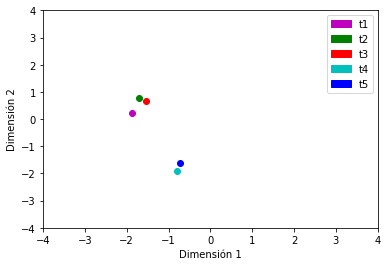

In [17]:
# Gráfico
color = ['m', 'g', 'r', 'c', 'b']
plt.figure()
patches = []

for i, texto in enumerate(textos):
    plt.plot(P[i, 0], P[i, 1], color[i] + "o")
    patches.append(mpatches.Patch(color = color[i], label = 't' + str(i + 1)))

plt.legend(handles=patches)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.axis([-4, 4, -4, 4])
plt.show()

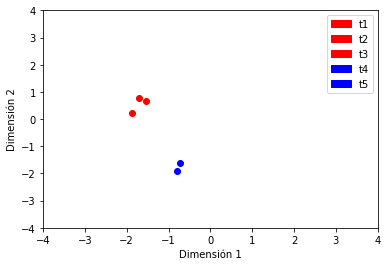

In [18]:
# Gráfico + clustering a mano

color = ['b' if p[0, 0] >-1 else 'r' for p in P] 
plt.figure()

patches = []

for i, texto in enumerate(textos):
    plt.plot(P[i, 0], P[i, 1], color[i] + "o")
    patches.append(mpatches.Patch(color = color[i], label='t' + str(i + 1)))

plt.legend(handles=patches)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.axis([-4, 4, -4, 4])
plt.show()

## 20newsgroups

In [53]:
# Importamos librerías
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [54]:
# Cargamos las categorías
categories = ['talk.religion.misc',
              'comp.graphics',
              'sci.space']

print("Cargando categorías:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documentos" % len(dataset.data))
print("%d categorías" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0] # Cantidad de labels que tenemos

Cargando categorías:
['talk.religion.misc', 'comp.graphics', 'sci.space']
2588 documentos
3 categorías



In [55]:
# Vectorizamos el texto con TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                             min_df=2, stop_words='english',
                             use_idf=True)

X = vectorizer.fit_transform(dataset.data)

print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 2588, n_features: 10000


In [56]:
# Armamos el pipeline porque el TruncatedSVD no devuelve los datos normalizados
# (va a ser importante normalizar para la etapa posterior)
svd = TruncatedSVD(100,random_state = 1) 
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)

In [57]:
X.shape

(2588, 100)

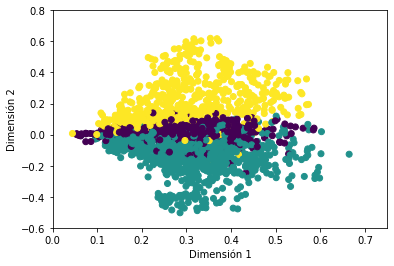

In [62]:
# Visualizamos la reducción de dimensiones
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.axis([0, 0.75, -0.6, 0.8])
plt.show()

In [63]:
# Clusterizamos con KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=true_k, max_iter=100, n_init=10, random_state = 1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [64]:
# Los centroides están mapeados en el espacio de dimensiones reducidas
# Hacemos la transformación inversa para ver el peso de los features originales (10000 dim)
original_space_centroids = svd.inverse_transform(km.cluster_centers_)

# La función argsort nos da los índices ordenados
order_centroids = original_space_centroids.argsort()[:, ::-1]

# Imprimimos los términos más "pesados" (frecuentes) para cada categoría
# Con los índices ordenados, llamamos a la descripción de las palabras que construyó el Vectorizer()
terms = vectorizer.get_feature_names()

print("Ranking de términos por tópico:")

for i in range(true_k):
    print("Tópico  %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

# Nos quedamos con los 10 índices ordenados más importantes en cada tópico
# Los tópicos parecen tener sentido: Tópico 0(religion), Tópico 1(gráficos) y Tópico 2(espacio)

Ranking de términos por tópico:
Tópico  0: space nasa access henry com digex pat gov toronto shuttle
Tópico  1: god com jesus christian people sandvik don bible article koresh
Tópico  2: graphics university thanks image com files help computer 3d posting


In [66]:
['talk.religion.misc', 'comp.graphics', 'sci.space']

['talk.religion.misc', 'comp.graphics', 'sci.space']

# LDA

https://medium.com/@arik.pamnani/topic-models-latent-dirichlet-allocation-ca32c4505975

![](https://miro.medium.com/max/637/1*taTOiaCpd_CzGugx_PticQ.png)

In [67]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import string

import unicodedata

In [89]:
import nltk

from nltk.corpus import stopwords
stop = stopwords.words('spanish')
exclude = string.punctuation

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Para visualizar
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [70]:
p12 = pd.read_csv('pagina12.csv', encoding='utf-8')
p12.head()

,Unnamed: 0,cuerpo,fecha_hora,imagen,resumen,suplemento,titulo,url
0,0,Cines\nANNABELLE 2 2D\nCon Alicia Vela Bailey ...,09 de octubre de 2017,https://images.pagina12.com.ar/styles/width960...,NaN,NaN,Cartelera,https://www.pagina12.com.ar/67696-cartelera
1,1,Los comicios para elegir gobernador en Corrien...,08 de octubre de 2017,https://images.pagina12.com.ar/styles/focal_16...,Pasadas las 21 comenzaron a cargarse los prime...,El país,Ventaja para Cambiemos en un lento escrutinio,https://www.pagina12.com.ar/67853-ventaja-para...
2,2,Cientos de miles de personas llenaron este dom...,08 de octubre de 2017,https://images.pagina12.com.ar/styles/focal_16...,"El escritor peruano Mario Varga Llosa, ícono d...",El mundo,Con Vargas Llosa a la cabeza,https://www.pagina12.com.ar/67876-con-vargas-l...
3,3,Entre las 15 y las 22 en el Konex (Sarmiento 3...,08 de octubre de 2017,https://images.pagina12.com.ar/styles/focal_16...,Los familiares de las víctimas de la tragedia ...,Sociedad,Por los chicos del Ecos,https://www.pagina12.com.ar/67872-por-los-chic...
4,4,La primera vez que escuché hablar sobre el Che...,08 de octubre de 2017,https://images.pagina12.com.ar/styles/focal_16...,NaN,NaN,Ese nombre,https://www.pagina12.com.ar/67873-ese-nombre


In [71]:
len(p12)

221

In [72]:
p12['suplemento'].unique()

array([nan, 'El país', 'El mundo', 'Sociedad', 'Deportes', 'Contratapa',
       'Economía', 'Cultura', 'Universidad', 'Plástica'], dtype=object)

In [73]:
# Nos concentramos en la sección 'El país', conservando titulo y cuerpo de la noticia
pais = p12.loc[p12['suplemento'] == 'El país', ['titulo', 'cuerpo']]

# Concatenamos y volcamos el resulado en la columna 'noticia'
pais['noticia'] = (pais['titulo'] + ' ' + pais['cuerpo'])

# Normalizamos el texto
pais['noticia'] = pais['noticia'].apply(lambda x: unicodedata.normalize("NFKD", x.lower()))
pais.head()

,titulo,cuerpo,noticia
1,Ventaja para Cambiemos en un lento escrutinio,Los comicios para elegir gobernador en Corrien...,ventaja para cambiemos en un lento escrutinio ...
5,“Están a un pasito de volver a hablar de campa...,"En un nuevo acto de campaña, esta vez en Malv...",“están a un pasito de volver a hablar de camp...
6,"""Síganlo buscando""",“Síganlo buscando” fue la cínica respuesta de ...,"""síganlo buscando"" “síganlo buscando” fue la..."
7,"""Buen día drogadictos""",Esta mañana el gobernador correntino Ricardo C...,"""buen día drogadictos"" esta mañana el gobern..."
9,"""La historia los va a condenar”",El viernes por la noche Milagro Sala fue notif...,"""la historia los va a condenar” el viernes por..."


In [74]:
pais

,titulo,cuerpo,noticia
1,Ventaja para Cambiemos en un lento escrutinio,Los comicios para elegir gobernador en Corrien...,ventaja para cambiemos en un lento escrutinio ...
5,“Están a un pasito de volver a hablar de campa...,"En un nuevo acto de campaña, esta vez en Malv...",“están a un pasito de volver a hablar de camp...
6,"""Síganlo buscando""",“Síganlo buscando” fue la cínica respuesta de ...,"""síganlo buscando"" “síganlo buscando” fue la..."
7,"""Buen día drogadictos""",Esta mañana el gobernador correntino Ricardo C...,"""buen día drogadictos"" esta mañana el gobern..."
9,"""La historia los va a condenar”",El viernes por la noche Milagro Sala fue notif...,"""la historia los va a condenar” el viernes por..."
...,...,...,...
215,Dirigente mapuche denuncia amenazas,"Moira Millan, dirigente mapuche de la comunida...",dirigente mapuche denuncia amenazas moira mill...
216,"""Tengo diferencias de fondo con este Gobierno""",El ex ministro de Transporte y candidato a sen...,"""tengo diferencias de fondo con este gobierno""..."
217,"""España está ante una encrucijada""",En la conferencia de prensa brindada hoy por l...,"""españa está ante una encrucijada"" en la con..."
218,AMIA: el informe que mostró CFK,En la conferencia de prensa que Cristina Ferná...,amia: el informe que mostró cfk en la confere...


# Primera corrida - unigramas

In [80]:
# Definimos una función para limpiar los textos de stopwords y signos de puntuación
import spacy 

sp = spacy.load('es_core_news_md')

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    return punc_free

In [81]:
doc=sp(pais.noticia[1])

In [82]:
# Chequeamos un resultado a modo de ejemplo
pais.noticia[1]

'ventaja para cambiemos en un lento escrutinio los comicios para elegir gobernador en corrientes cerraron pasadas las 18, con algunos inconvenientes para la apertura de mesas y demoras por el mal clima en la provincia, pero sin denuncias de irregularidades. a partir de las 21 comenzaron a conocerse los primeros resultados de un escrutinio provisorio que promete ser bastante lento.\ncon 283 mesas contabilizadas de las 2407 que se abrieron, el candidato de eco + cambiemos, gustavo valdés, obtiene el 52,72 por ciento de los votos. en segundo lugar aparece el postulante del frente corrientes podemos más, carlos "camau" espínola, que se queda con el 46,15 por ciento.\nen la alianza oficialista se adelantaron a celebrar el resultado desde su cuenta de twitter. \n\nloading tweet ... \n\n\nel gran respaldo del gobierno nacional a canteros se volvió a hacer visible hoy: se encuentran en la capital correntina el ministro de agroindustria, ricardo buryaile, y el gobernador de jujuy, gerardo m

In [99]:
cld=list()
for x in doc:
    if x.is_stop:
        pass
    else:
        cld.append(x)

In [90]:
clean(pais.noticia[1])

'ventaja cambiemos lento escrutinio comicios elegir gobernador corrientes cerraron pasadas 18 inconvenientes apertura mesas demoras mal clima provincia denuncias irregularidades partir 21 comenzaron conocerse primeros resultados escrutinio provisorio promete ser bastante lento 283 mesas contabilizadas 2407 abrieron candidato eco  cambiemos gustavo valdés obtiene 5272 ciento votos segundo lugar aparece postulante frente corrientes podemos más carlos camau espínola queda 4615 ciento alianza oficialista adelantaron celebrar resultado cuenta twitter loading tweet  gran respaldo gobierno nacional canteros volvió hacer visible hoy encuentran capital correntina ministro agroindustria ricardo buryaile gobernador jujuy gerardo morales espera llegada jefe gabinete marcos peña ministro interior rogelio frigerio'

In [98]:
' '.join([x.text for x in cld])

'ventaja cambiemos lento escrutinio comicios elegir gobernador corrientes cerraron pasadas 18 , inconvenientes apertura mesas y demoras clima provincia , denuncias irregularidades . a 21 comenzaron a conocerse resultados escrutinio provisorio promete lento . \n 283 mesas contabilizadas 2407 abrieron , candidato eco + cambiemos , gustavo valdés , obtiene 52,72 ciento votos . aparece postulante frente corrientes más , carlos " camau " espínola , queda 46,15 ciento . \n alianza oficialista adelantaron a celebrar resultado twitter . \n\n loading tweet ... \n\n\n respaldo gobierno nacional a canteros volvió a visible : encuentran capital correntina ministro agroindustria , ricardo buryaile , y gobernador jujuy , gerardo morales , y espera llegada jefe gabinete marcos peña y ministro interior , rogelio frigerio . \n \n'

In [101]:
# Aplicamos la función a cada documento del corpus
nota_clean = [clean(nota).split() for nota in pais['noticia']]


In [102]:
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess

In [103]:
# Construimos nuestro diccionario
dictionary = corpora.Dictionary(nota_clean) 

In [104]:
print(dictionary)

Dictionary(6981 unique tokens: ['18', '21', '2407', '283', '4615']...)


In [105]:
corpus = [dictionary.doc2bow(nota) for nota in nota_clean]

In [109]:
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('18', 1),
  ('21', 1),
  ('2407', 1),
  ('283', 1),
  ('4615', 1),
  ('5272', 1),
  ('abrieron', 1),
  ('adelantaron', 1),
  ('agroindustria', 1),
  ('alianza', 1),
  ('aparece', 1),
  ('apertura', 1),
  ('bastante', 1),
  ('buryaile', 1),
  ('camau', 1),
  ('cambiemos', 2),
  ('candidato', 1),
  ('canteros', 1),
  ('capital', 1),
  ('carlos', 1),
  ('celebrar', 1),
  ('cerraron', 1),
  ('ciento', 2),
  ('clima', 1),
  ('comenzaron', 1),
  ('comicios', 1),
  ('conocerse', 1),
  ('contabilizadas', 1),
  ('correntina', 1),
  ('corrientes', 2),
  ('cuenta', 1),
  ('demoras', 1),
  ('denuncias', 1),
  ('eco', 1),
  ('elegir', 1),
  ('encuentran', 1),
  ('escrutinio', 2),
  ('espera', 1),
  ('espínola', 1),
  ('frente', 1),
  ('frigerio', 1),
  ('gabinete', 1),
  ('gerardo', 1),
  ('gobernador', 2),
  ('gobierno', 1),
  ('gran', 1),
  ('gustavo', 1),
  ('hacer', 1),
  ('hoy', 1),
  ('inconvenientes', 1),
  ('interior', 1),
  ('irregularidades', 1),
  ('jefe', 1),
  ('jujuy', 1),
  ('len

In [110]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=5, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [111]:
# Visualizamos los tópicos

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.072636  0.028682       1        1  38.183193
0     -0.135604  0.048601       2        1  20.944134
2     -0.016816 -0.128641       3        1  15.222865
3      0.032238  0.006393       4        1  13.198648
1      0.047546  0.044964       5        1  12.451151, topic_info=             Term       Freq      Total Category  logprob  loglift
152            ex  57.000000  57.000000  Default  30.0000  30.0000
1219        salud  31.000000  31.000000  Default  29.0000  29.0000
115           che  30.000000  30.000000  Default  28.0000  28.0000
4846  memorándum  14.000000  14.000000  Default  27.0000  27.0000
4791      bonadio  14.000000  14.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
186      mientras   4.590504  19.272839   Topic5  -6.2864   0.6487
222            si   5.246565  36.949005   Topic5  -6.1529   0.1314
150         está   5.245514  47.966774   Topic5  -6.1531  -0.1298
249           “el   4.609007  24.695560   Topic5  -6.2824   0.4047
178         macri   4.597303  51.219879   Topic5  -6.2850  -0.3273

[363 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1305      5  0.502992       2
3479      1  0.812669       4
94        1  0.294719      50
94        2  0.147359      50
94        4  0.515758      50
...     ...       ...     ...
249       4  0.202466     “el
249       5  0.202466     “el
254       2  0.838004     “se
254       4  0.104750     “se
6031      3  0.722783  “vidal

[669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

In [112]:
lda_model.print_topics(-1)

[(0,
  '0.006*"santiago" + 0.005*"hospitales" + 0.004*"sergio" + 0.004*"sala" + 0.004*"también" + 0.003*"juez" + 0.003*"maldonado" + 0.003*"desaparición" + 0.003*"más" + 0.003*"cidh"'),
 (1,
  '0.007*"salud" + 0.004*"peronismo" + 0.004*"más" + 0.004*"gobierno" + 0.004*"corrientes" + 0.003*"nacional" + 0.003*"ser" + 0.003*"gobernador" + 0.003*"hospitales" + 0.003*"hoy"'),
 (2,
  '0.010*"ex" + 0.007*"gobierno" + 0.005*"también" + 0.004*"memorándum" + 0.004*"bonadio" + 0.004*"irán" + 0.004*"juez" + 0.004*"cristina" + 0.004*"argentina" + 0.003*"macri"'),
 (3,
  '0.005*"gobierno" + 0.005*"más" + 0.005*"trabajo" + 0.005*"está" + 0.004*"años" + 0.004*"che" + 0.004*"derechos" + 0.004*"reforma" + 0.004*"también" + 0.003*"si"'),
 (4,
  '0.006*"más" + 0.005*"gobierno" + 0.004*"presidente" + 0.004*"macri" + 0.003*"años" + 0.003*"santiago" + 0.003*"había" + 0.003*"está" + 0.003*"también" + 0.003*"che"')]

In [113]:
stop.append('che')
stop.append('más')
stop.append('ex')
stop.append('tambien')
stop.append('mas')

# Segunda corrida - trigramas con min_count = 5 y threshold = 100

In [114]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(nota_clean))

print(data_words[:1])

[['ventaja', 'cambiemos', 'lento', 'escrutinio', 'comicios', 'elegir', 'gobernador', 'corrientes', 'cerraron', 'pasadas', 'inconvenientes', 'apertura', 'mesas', 'demoras', 'mal', 'clima', 'provincia', 'denuncias', 'irregularidades', 'partir', 'comenzaron', 'conocerse', 'primeros', 'resultados', 'escrutinio', 'provisorio', 'promete', 'ser', 'bastante', 'lento', 'mesas', 'contabilizadas', 'abrieron', 'candidato', 'eco', 'cambiemos', 'gustavo', 'valdes', 'obtiene', 'ciento', 'votos', 'segundo', 'lugar', 'aparece', 'postulante', 'frente', 'corrientes', 'podemos', 'mas', 'carlos', 'camau', 'espinola', 'queda', 'ciento', 'alianza', 'oficialista', 'adelantaron', 'celebrar', 'resultado', 'cuenta', 'twitter', 'loading', 'tweet', 'gran', 'respaldo', 'gobierno', 'nacional', 'canteros', 'volvio', 'hacer', 'visible', 'hoy', 'encuentran', 'capital', 'correntina', 'ministro', 'agroindustria', 'ricardo', 'buryaile', 'gobernador', 'jujuy', 'gerardo', 'morales', 'espera', 'llegada', 'jefe', 'gabinete', 

In [115]:
# Construimos los modelos de bigramas y trigramas
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # A mayor umbral, menor cantidad de frases formadas
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Vemos un ejemplo
print(trigram_mod[bigram_mod[data_words[0]]])

['ventaja', 'cambiemos', 'lento', 'escrutinio', 'comicios', 'elegir', 'gobernador', 'corrientes', 'cerraron', 'pasadas', 'inconvenientes', 'apertura', 'mesas', 'demoras', 'mal', 'clima', 'provincia', 'denuncias', 'irregularidades', 'partir', 'comenzaron', 'conocerse', 'primeros', 'resultados', 'escrutinio_provisorio', 'promete', 'ser', 'bastante', 'lento', 'mesas', 'contabilizadas', 'abrieron', 'candidato', 'eco', 'cambiemos', 'gustavo', 'valdes', 'obtiene', 'ciento', 'votos', 'segundo', 'lugar', 'aparece', 'postulante', 'frente', 'corrientes_podemos', 'mas', 'carlos', 'camau_espinola', 'queda', 'ciento', 'alianza', 'oficialista', 'adelantaron', 'celebrar', 'resultado', 'cuenta', 'twitter', 'loading', 'tweet', 'gran', 'respaldo', 'gobierno', 'nacional', 'canteros', 'volvio', 'hacer', 'visible', 'hoy', 'encuentran', 'capital', 'correntina', 'ministro', 'agroindustria', 'ricardo', 'buryaile', 'gobernador', 'jujuy', 'gerardo', 'morales', 'espera', 'llegada', 'jefe_gabinete', 'marcos_pena'

In [116]:
# Definimos funciones para stop words, bigramas y trigramas

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc), deacc=True) if word not in stop] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [117]:
# Removemos Stop Words
data_words_nostops = remove_stopwords(data_words)

# Formamos los trigramas
data_words_trigrams = make_trigrams(data_words_nostops)

In [118]:
print(data_words_trigrams[0])

['ventaja', 'cambiemos', 'lento', 'escrutinio', 'comicios', 'elegir', 'gobernador', 'corrientes', 'cerraron', 'pasadas', 'inconvenientes', 'apertura', 'mesas', 'demoras', 'mal', 'clima', 'provincia', 'denuncias', 'irregularidades', 'partir', 'comenzaron', 'conocerse', 'primeros', 'resultados', 'escrutinio_provisorio', 'promete', 'ser', 'bastante', 'lento', 'mesas', 'contabilizadas', 'abrieron', 'candidato', 'eco', 'cambiemos', 'gustavo', 'valdes', 'obtiene', 'ciento', 'votos', 'segundo', 'lugar', 'aparece', 'postulante', 'frente', 'corrientes_podemos', 'carlos', 'camau_espinola', 'queda', 'ciento', 'alianza', 'oficialista', 'adelantaron', 'celebrar', 'resultado', 'cuenta', 'twitter', 'loading', 'tweet', 'gran', 'respaldo', 'gobierno', 'nacional', 'canteros', 'volvio', 'hacer', 'visible', 'hoy', 'encuentran', 'capital', 'correntina', 'ministro', 'agroindustria', 'ricardo', 'buryaile', 'gobernador', 'jujuy', 'gerardo', 'morales', 'espera', 'llegada', 'jefe_gabinete', 'marcos_pena', 'mini

In [119]:
data_words_trigrams

[['ventaja',
  'cambiemos',
  'lento',
  'escrutinio',
  'comicios',
  'elegir',
  'gobernador',
  'corrientes',
  'cerraron',
  'pasadas',
  'inconvenientes',
  'apertura',
  'mesas',
  'demoras',
  'mal',
  'clima',
  'provincia',
  'denuncias',
  'irregularidades',
  'partir',
  'comenzaron',
  'conocerse',
  'primeros',
  'resultados',
  'escrutinio_provisorio',
  'promete',
  'ser',
  'bastante',
  'lento',
  'mesas',
  'contabilizadas',
  'abrieron',
  'candidato',
  'eco',
  'cambiemos',
  'gustavo',
  'valdes',
  'obtiene',
  'ciento',
  'votos',
  'segundo',
  'lugar',
  'aparece',
  'postulante',
  'frente',
  'corrientes_podemos',
  'carlos',
  'camau_espinola',
  'queda',
  'ciento',
  'alianza',
  'oficialista',
  'adelantaron',
  'celebrar',
  'resultado',
  'cuenta',
  'twitter',
  'loading',
  'tweet',
  'gran',
  'respaldo',
  'gobierno',
  'nacional',
  'canteros',
  'volvio',
  'hacer',
  'visible',
  'hoy',
  'encuentran',
  'capital',
  'correntina',
  'ministro',


In [120]:
dictionary_1 = corpora.Dictionary(data_words_trigrams)

In [121]:
print(dictionary_1)

Dictionary(6160 unique tokens: ['abrieron', 'adelantaron', 'agroindustria', 'alianza', 'aparece']...)


In [122]:
corpus_1 = [dictionary_1.doc2bow(nota) for nota in data_words_trigrams]

In [123]:
[[(dictionary_1[id], freq) for id, freq in cp] for cp in corpus_1[:1]]

[[('abrieron', 1),
  ('adelantaron', 1),
  ('agroindustria', 1),
  ('alianza', 1),
  ('aparece', 1),
  ('apertura', 1),
  ('bastante', 1),
  ('buryaile', 1),
  ('camau_espinola', 1),
  ('cambiemos', 2),
  ('candidato', 1),
  ('canteros', 1),
  ('capital', 1),
  ('carlos', 1),
  ('celebrar', 1),
  ('cerraron', 1),
  ('ciento', 2),
  ('clima', 1),
  ('comenzaron', 1),
  ('comicios', 1),
  ('conocerse', 1),
  ('contabilizadas', 1),
  ('correntina', 1),
  ('corrientes', 1),
  ('corrientes_podemos', 1),
  ('cuenta', 1),
  ('demoras', 1),
  ('denuncias', 1),
  ('eco', 1),
  ('elegir', 1),
  ('encuentran', 1),
  ('escrutinio', 1),
  ('escrutinio_provisorio', 1),
  ('espera', 1),
  ('frente', 1),
  ('gerardo', 1),
  ('gobernador', 2),
  ('gobierno', 1),
  ('gran', 1),
  ('gustavo', 1),
  ('hacer', 1),
  ('hoy', 1),
  ('inconvenientes', 1),
  ('irregularidades', 1),
  ('jefe_gabinete', 1),
  ('jujuy', 1),
  ('lento', 2),
  ('llegada', 1),
  ('loading', 1),
  ('lugar', 1),
  ('mal', 1),
  ('marc

In [124]:
ldamodel_1 = gensim.models.ldamodel.LdaModel(corpus=corpus_1,
                                             id2word=dictionary_1,
                                             num_topics=5, 
                                             random_state=100,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha='auto',
                                             per_word_topics=True)

In [125]:
# Visualizamos los tópicos

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_1, corpus_1, dictionary_1)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.048388  0.119586       1        1  26.765167
3      0.062782  0.026064       2        1  23.315283
1     -0.105782 -0.081633       3        1  21.257643
2      0.090715 -0.049332       4        1  21.021070
0      0.000674 -0.014684       5        1   7.640839, topic_info=                        Term       Freq      Total Category  logprob  loglift
1082                   salud  34.000000  34.000000  Default  30.0000  30.0000
56                  nacional  41.000000  41.000000  Default  29.0000  29.0000
926               hospitales  32.000000  32.000000  Default  28.0000  28.0000
404                 santiago  30.000000  30.000000  Default  27.0000  27.0000
3037                  pedido   9.000000   9.000000  Default  26.0000  26.0000
...                      ...        ...        ...      ...      ...      ...
200                    tener   2.716686  17.153343   Topic5  -6.2211   0.7289
679                    falta   2.714550  11.086847   Topic5  -6.2219   1.1645
356                    mismo   2.712211  17.279083   Topic5  -6.2227   0.7199
1047  provincia_buenos_aires   2.709320   9.445566   Topic5  -6.2238   1.3228
715                     plan   2.709193   8.692981   Topic5  -6.2239   1.4058

[360 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2865      2  0.070807   abogados
2865      3  0.708073   abogados
2865      4  0.141615   abogados
2865      5  0.070807   abogados
4736      4  0.885192    aclarar
...     ...       ...        ...
1137      1  0.933094      vidal
1137      4  0.066650      vidal
3916      2  0.147045  violencia
3916      4  0.735227  violencia
6034      5  0.565343      zorra

[680 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

In [126]:
ldamodel_1.print_topics(-1)

[(0,
  '0.006*"salud" + 0.006*"gobierno" + 0.005*"nacional" + 0.004*"pedido" + 0.003*"candidato" + 0.003*"carga" + 0.003*"respuesta" + 0.003*"unidad_ciudadana" + 0.003*"garantizar" + 0.002*"obras"'),
 (1,
  '0.004*"trabajo" + 0.003*"defensa" + 0.003*"dos" + 0.003*"derecho" + 0.003*"fallo" + 0.003*"abogados" + 0.003*"gobierno" + 0.003*"presidente" + 0.003*"justicia" + 0.003*"ano"'),
 (2,
  '0.006*"hospitales" + 0.005*"gobierno" + 0.005*"santiago" + 0.004*"dos" + 0.003*"hospital" + 0.003*"dias" + 0.003*"salud" + 0.003*"desaparicion" + 0.003*"sergio" + 0.003*"dijo"'),
 (3,
  '0.006*"gobierno" + 0.005*"si" + 0.004*"juez" + 0.004*"ser" + 0.003*"anos" + 0.003*"gobernador" + 0.003*"memorandum" + 0.003*"pais" + 0.003*"iran" + 0.003*"dos"'),
 (4,
  '0.006*"gobierno" + 0.004*"nacional" + 0.004*"peronismo" + 0.003*"anos" + 0.003*"ciento" + 0.003*"si" + 0.003*"habia" + 0.003*"vidal" + 0.003*"argentina" + 0.003*"valdes"')]